<a href="https://colab.research.google.com/github/LucasAb8/IAAA1-DISTANCIA_Oficial/blob/main/TP2_AA1_Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1

Lucas Abruzzo

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

El dataset elegido es: Seoul Bike Sharing Demand  
El link del Dataset es https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
Cuenta con 13 variables y un target:

*   Date: Date
*   Rented Bike Count: Int
*   Hour: Int
*   Temperature: Float (Contínuo)
*   Humidity: Int
*   Wind speed: Float (Contínuo)
*   Visibility: Int
*   Dew point temperature: Float (Contínuo)
*   Solar Radiation: Float (Contínuo)
*   Rainfall: Int
*   Snowfall: int
*   Seasons: categórico
*   Holiday	: Binario
*   Functioning Day: Binario


El dataset propone utilizar "Functioning Day" como target, pero debido a la naturaleza de regresión lineal de la consigna y a las posibilidades de análisis, decidí utilizar "Rented Bike Count" como target y poder analizar la cantidad de bicicletas necesarias por hora dados los datos que los features aportan.



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Detección de Outliers
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

#Heatmap
from matplotlib.colors import LinearSegmentedColormap

#Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Regresión lineal
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.inspection import permutation_importance


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

#Carga del Dataset

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"  #Url donde se encuentra el dataset
df_bikes = pd.read_csv(url, encoding="ISO-8859-1")  #carga del dataset
df_bikes.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#Información general sobre el conjunto de datos

In [7]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#Descripción estadística

In [8]:
df_bikes.describe()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#Valores Nulos
La información de la página del dataset asegura que no existen valores nulos. Sin embargo, una buena práctica es revisar esto igualmente para evitar problemas futuros

In [9]:
df_bikes.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


#Outliers
Para analizar los outliers no se tiene en cuenta los campos binarios (ya que no tiene sentido), las horas ni las variables categóricas

In [10]:
# Isolation Forest
# Seleccionamos solo columnas numéricas para el modelo
exclude = ['Date','Holiday','Functioning Day','Hour','Seasons']
columns = [col for col in df_bikes.columns if col not in exclude]

X_number = df_bikes[columns].copy()

# Aplicamos imputación para manejar valores faltantes
X_number_imputed = SimpleImputer(strategy='mean').fit_transform(X_number)

# Entrenamos el modelo Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X_number_imputed)

# -1 para outliers, 1 para inliers
df_outliers = df_bikes.copy()
df_outliers['outlier'] = outliers

print(f"Número de outliers detectados por Isolation Forest: {sum(outliers == -1)}")
print(f"Porcentaje de outliers: {sum(outliers == -1) / len(outliers) * 100:.2f}%")


Número de outliers detectados por Isolation Forest: 438
Porcentaje de outliers: 5.00%


#Distribuciones

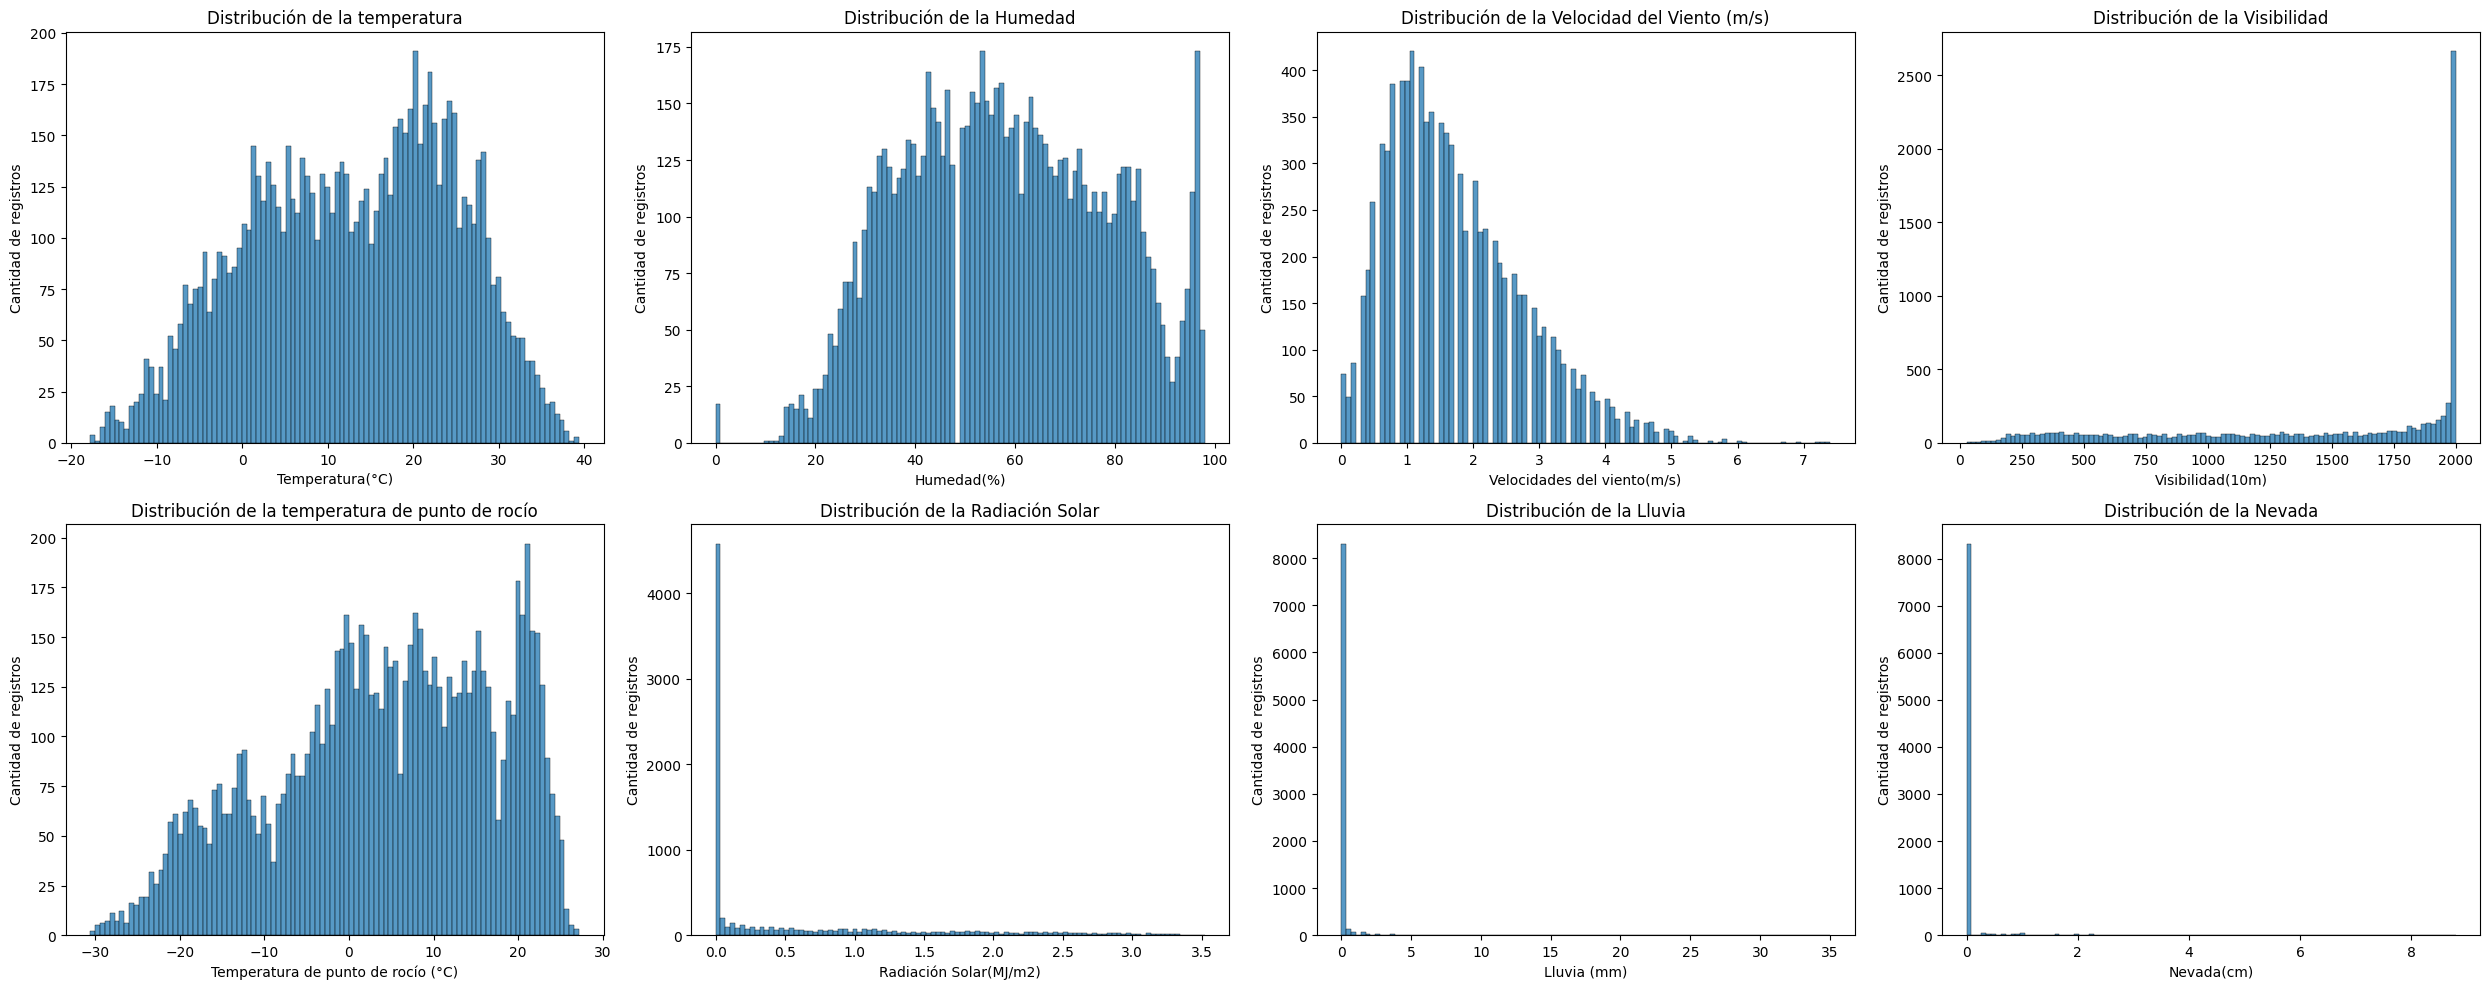

In [11]:
# Visualizamos la distribución de algunas variables categóricas
plt.figure(figsize=(25, 10))

#Temperatura
plt.subplot(2, 4, 1)
sns.histplot(df_bikes['Temperature(°C)'], bins=100, kde=False)  # bins = número de rangos
plt.title("Distribución de la temperatura")
plt.xlabel("Temperatura(°C)")
plt.ylabel("Cantidad de registros")

#Humedad
plt.subplot(2, 4, 2)
sns.histplot(df_bikes['Humidity(%)'], bins=100, kde=False)
plt.title("Distribución de la Humedad")
plt.xlabel("Humedad(%)")
plt.ylabel("Cantidad de registros")

#Velocidad viento
plt.subplot(2, 4, 3)
sns.histplot(df_bikes['Wind speed (m/s)'], bins=100, kde=False)
plt.title("Distribución de la Velocidad del Viento (m/s)")
plt.xlabel("Velocidades del viento(m/s)")
plt.ylabel("Cantidad de registros")


#visibilidad
plt.subplot(2, 4, 4)
sns.histplot(df_bikes['Visibility (10m)'], bins=100, kde=False)
plt.title("Distribución de la Visibilidad")
plt.xlabel("Visibilidad(10m)")
plt.ylabel("Cantidad de registros")

#Temperatura de rocío
plt.subplot(2, 4, 5)
sns.histplot(df_bikes['Dew point temperature(°C)'], bins=100, kde=False)
plt.title("Distribución de la temperatura de punto de rocío")
plt.xlabel("Temperatura de punto de rocío (°C)")
plt.ylabel("Cantidad de registros")


#Radiación Solar
plt.subplot(2, 4, 6)
sns.histplot(df_bikes['Solar Radiation (MJ/m2)'], bins=100, kde=False)
plt.title("Distribución de la Radiación Solar")
plt.xlabel("Radiación Solar(MJ/m2)")
plt.ylabel("Cantidad de registros")

#Lluvia
plt.subplot(2, 4, 7)
sns.histplot(df_bikes['Rainfall(mm)'], bins=100, kde=False)
plt.title("Distribución de la Lluvia")
plt.xlabel("Lluvia (mm)")
plt.ylabel("Cantidad de registros")

#Nevada
plt.subplot(2, 4, 8)
sns.histplot(df_bikes['Snowfall (cm)'], bins=100, kde=False)
plt.title("Distribución de la Nevada")
plt.xlabel("Nevada(cm)")
plt.ylabel("Cantidad de registros")

plt.tight_layout()
plt.show()


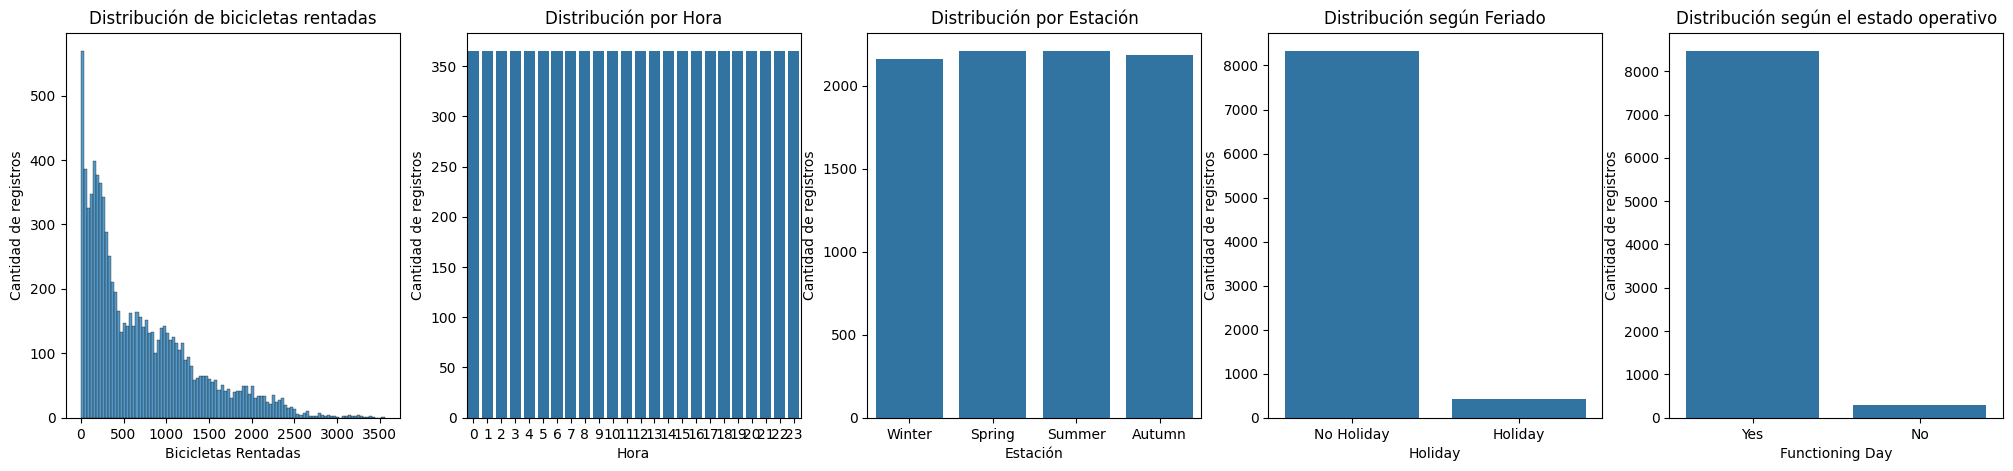

In [12]:
plt.figure(figsize=(25, 5))

#Distribución de bicicletas rentadas
plt.subplot(1, 5, 1)
sns.histplot(df_bikes['Rented Bike Count'], bins=100, kde=False)  # bins = número de rangos
plt.title("Distribución de bicicletas rentadas")
plt.xlabel("Bicicletas Rentadas")
plt.ylabel("Cantidad de registros")

#Distribución de horas: este gráfico podría verse inicialmente trivial...pero poder analizarlo es de gran utilidad para verificar que no solo responden a una etsructura cíclica
#sino que, además, hay igual cantidad de registros para cada hora (lo cual hace mas consistente y enriquecedor el proyecto en general)
plt.subplot(1, 5, 2)
sns.countplot(x='Hour', data=df_bikes)
plt.title("Distribución por Hora")
plt.xlabel("Hora")
plt.ylabel("Cantidad de registros")

#Estaciones
plt.subplot(1, 5, 3)
sns.countplot(x='Seasons', data=df_bikes)
plt.title("Distribución por Estación")
plt.xlabel("Estación")
plt.ylabel("Cantidad de registros")

#Feriados
plt.subplot(1, 5, 4)
sns.countplot(x='Holiday', data=df_bikes)
plt.title("Distribución según Feriado")
plt.ylabel("Cantidad de registros")

#Estado operativo
plt.subplot(1, 5, 5)
sns.countplot(x='Functioning Day', data=df_bikes)
plt.title("Distribución según el estado operativo")
plt.ylabel("Cantidad de registros")

plt.show()

#Relaciones features-target

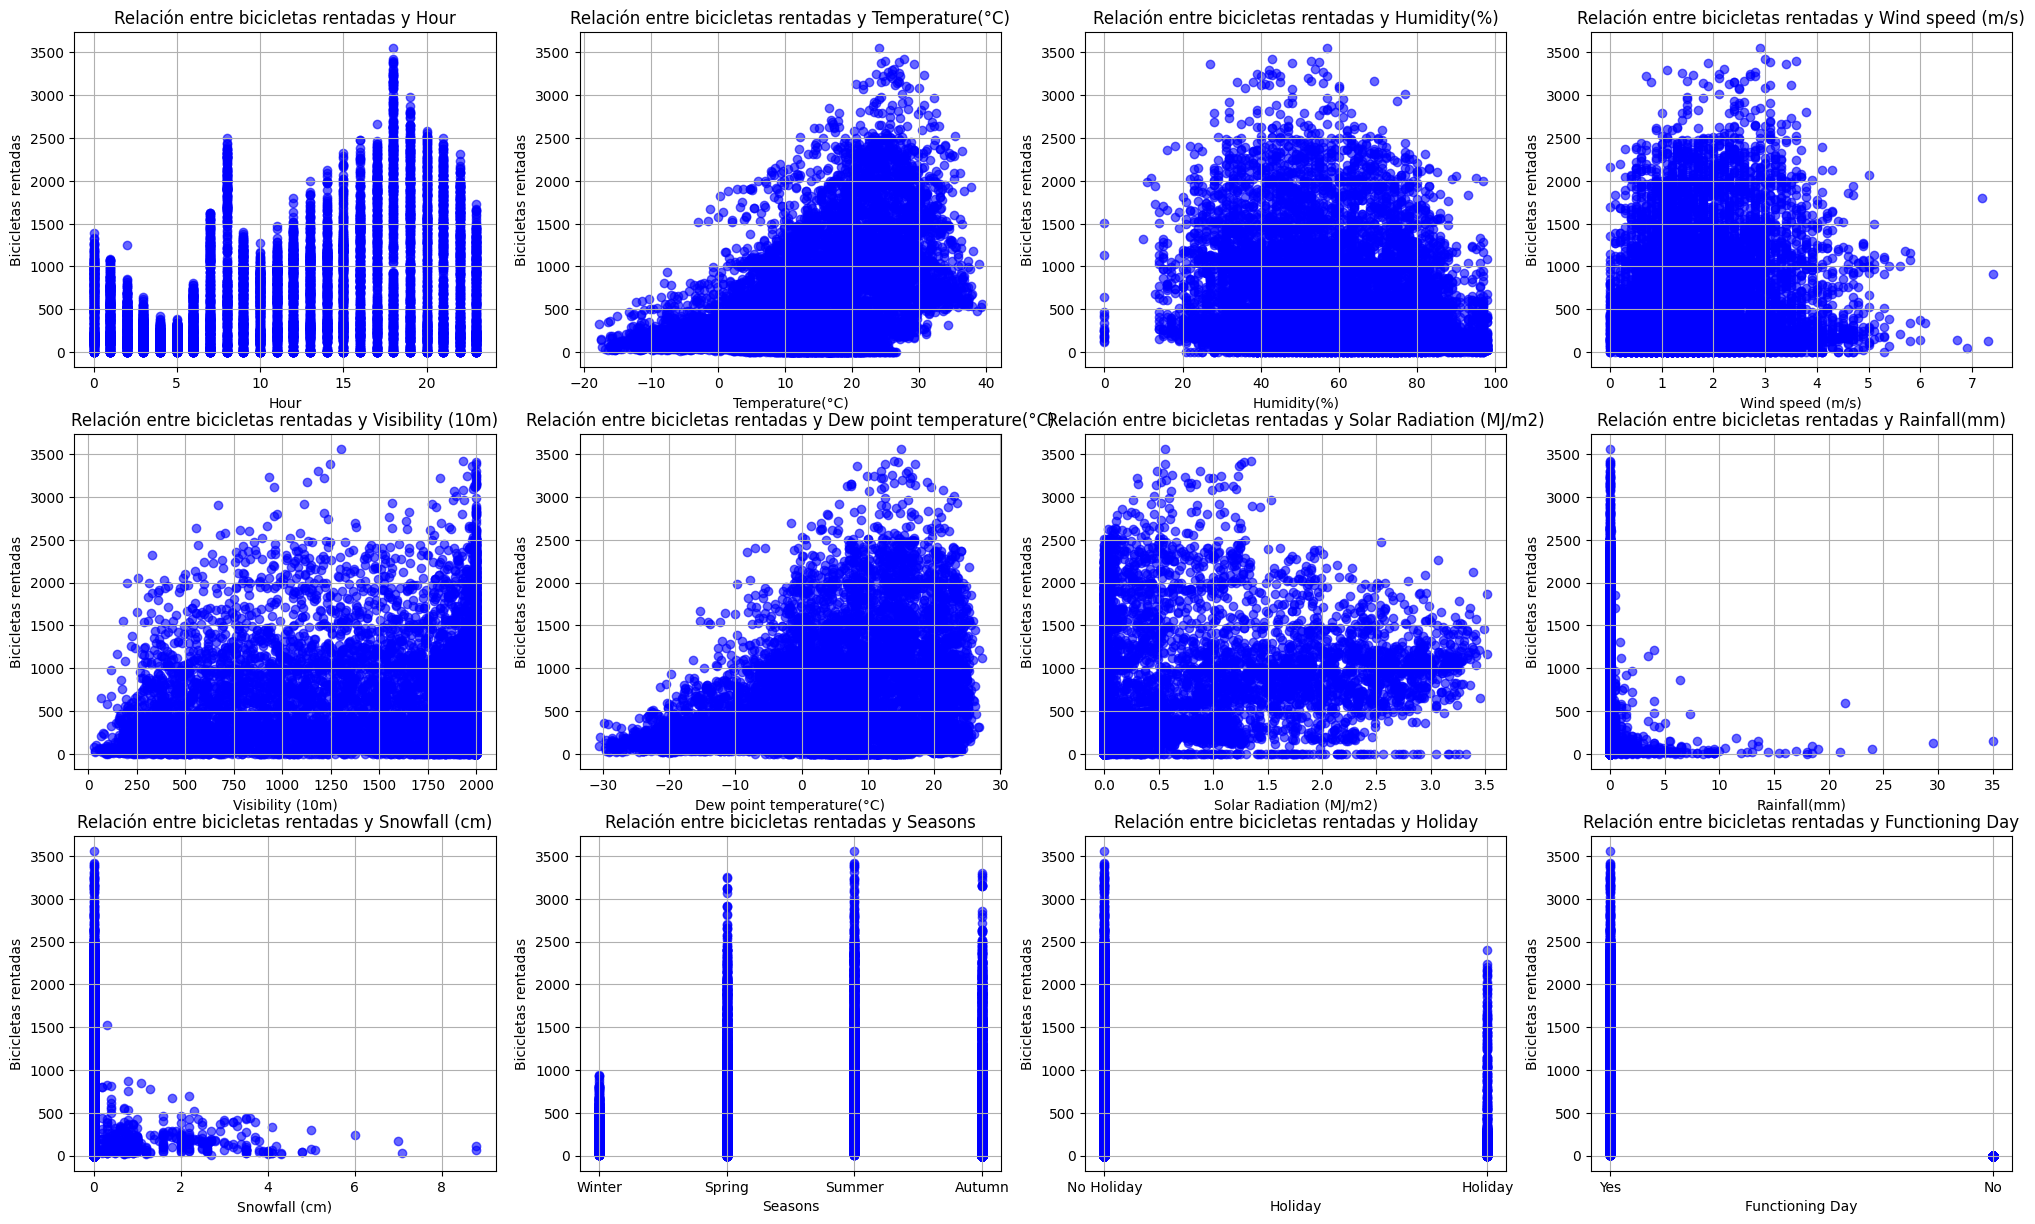

In [13]:
column_names = [col for col in df_bikes.columns if col != "Rented Bike Count" and col!= "Date"]
plt.figure(figsize=(25, 20))

# Variables
y = df_bikes['Rented Bike Count']

for i in column_names:
  plt.subplot(4, 4, column_names.index(i)+1)
  if i == "Date":
    plt.scatter(df_bikes['Date'], df_bikes['Rented Bike Count'], s=10, alpha=0.5)
  else:
    plt.scatter(df_bikes[i],  y, color='blue', alpha=0.6)
  plt.title(f"Relación entre bicicletas rentadas y {i}")
  plt.ylabel("Bicicletas rentadas")
  plt.xlabel(i)
  plt.grid(True)
plt.show()

#📈 Relaciones Lineales
Las relaciones lineales más fuertes (y por consecuencia, más útiles para la regresión lineal) son:

##🟢 Relación bicicletas rentadas - temperatura:
Podemos ver que hay una tendencia en aumento a medida que la temperatura se acerca a los 25 grados aproximadamente (clima templado), que suele ser ideal para las actividades al aire libre o circular por la calle. Esto se contrapone con las temperaturas más elevadas (hacia los 40 grados) o más bajas (bajo 0 grados), donde la renta de bicicletas es reducida.

##🟢 Relación bicicletas rentadas - visibilidad:
Mientras mayor es la visibilidad, más bicicletas son rentadas. Esto tiene sentido ya que, para andar en bicicleta, factores como la niebla pueden ser peligrosos.

##🟢 Relación bicicletas rentadas - temperatura de punto de rocío:
El punto de rocío es una medida absoluta de cuánta humedad contiene el aire. Existe una relación en la que, a medida que el punto de rocío sube, aumenta la cantidad de bicicletas rentadas, pero decrece luego de los 15 grados (el aire se siente demasiado húmedo).

##🟢 Relación bicicletas rentadas - lluvia:
No es lineal, se acerca más a una función exponencial con exponente negativo. Pero podría replantearse como una variable categórica binaria (llueve o no llueve) usando One-Hot Encoding.

##🟢 Relación bicicletas rentadas - nevada:
Caso similar al de la lluvia.

##🟢 Relación bicicletas rentadas - Holiday:
Existe una relación directa que puede aportar mucha información si se hace One-Hot Encoding o se le asignan valores (ej.: 0 y 1).

##⚠️ Relación bicicletas rentadas - hora (opcional):
00:00 - 05:00: decrecimiento (la gente duerme)
05:00 - 08:00: crecimiento fuerte (salida al trabajo/estudio)
10:00 - 17:00: crecimiento paulatino
17:00 - 18:00: crecimiento abrupto (hora de salida laboral)
18:00 - 24:00: decrecimiento (la gente llega a casa)


#Heatmap

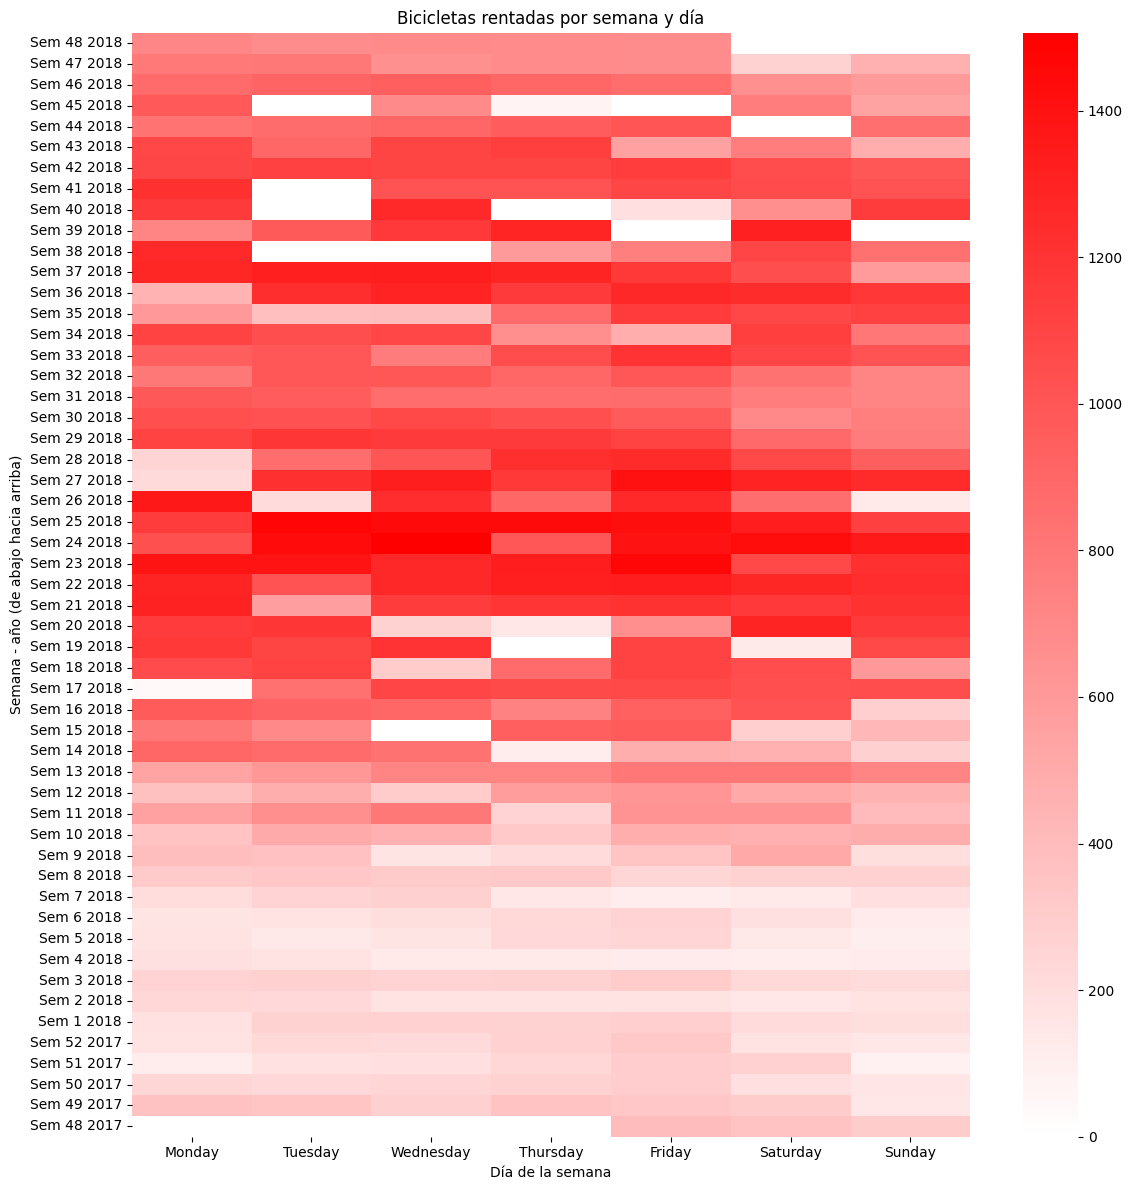

In [14]:

df_bikes_hm = df_bikes.copy(deep=True)

#Formateo de la fecha
df_bikes_hm['Date'] = pd.to_datetime(df_bikes_hm['Date'], dayfirst=True)

#Columnas necesarias para contruir la columna que se necesita para el heatmap
df_bikes_hm['day_of_week'] = df_bikes_hm['Date'].dt.day_name()           #Columna con los nombres de los días en ingles



#Semana y año ISO
df_bikes_hm['iso_year'] = df_bikes_hm['Date'].dt.isocalendar().year
df_bikes_hm['iso_week'] = df_bikes_hm['Date'].dt.isocalendar().week

# Columna final con el formato pedido
df_bikes_hm['semana_mes'] = (
    "Sem " + df_bikes_hm['iso_week'].astype(str) + " " + df_bikes_hm['iso_year'].astype(str)
)

# Agrupar por semana y día
df_pivot = (
    df_bikes_hm.groupby(['semana_mes', 'day_of_week'])['Rented Bike Count']
    .mean()
    .reset_index()
)

# Pivotear para formato heatmap
heatmap_data = df_pivot.pivot(index='semana_mes', columns='day_of_week', values='Rented Bike Count')

# Ordenar días de la semana
dias_orden = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(columns=dias_orden)

# Reordenar semanas cronológicamente
orden_semanas = (
    df_bikes_hm.groupby('semana_mes')['Date']
    .min()
    .sort_values()
    .index
)
heatmap_data = heatmap_data.reindex(orden_semanas)

# Rellenar valores faltantes
heatmap_data = heatmap_data.fillna(0)

# Invertir el orden del eje Y
heatmap_data = heatmap_data[::-1]

# Paleta de blanco a rojo
blanco_a_rojo = LinearSegmentedColormap.from_list("blanco_rojo", ["#ffffff", "#ff0000"])

# Graficar heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(
    heatmap_data,
    cmap=blanco_a_rojo,
    annot=False,
    fmt="g",
    yticklabels=heatmap_data.index  # etiquetas invertidas
)

plt.title("Bicicletas rentadas por semana y día")
plt.xlabel("Día de la semana")
plt.ylabel("Semana - año (de abajo hacia arriba)")
plt.tight_layout()
plt.show()




#Relación bicicletas rentadas - Fecha
Para poder encontrar relaciones, opté por hacer un heatmap. En la visualización se puede ver que hay períodos del año donde, por ejemplo, se rentan menos bicicletas (diciembre-febrero, que coincide con el invierno) o que, en viernes, sábado y domingo, se notan valores ligeramente más altos en la cantidad de bicicletas rentadas. Sin embargo, no existe relación lineal, por lo cual podría ser conflictivo para la regresión lineal.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

#Missing Values
No contiene, por lo que no es necesario trabajarlos


#Outliers

Número de outliers en 'Rented Bike Count': 158
Límite inferior: -1120.38
Límite superior: 2376.62


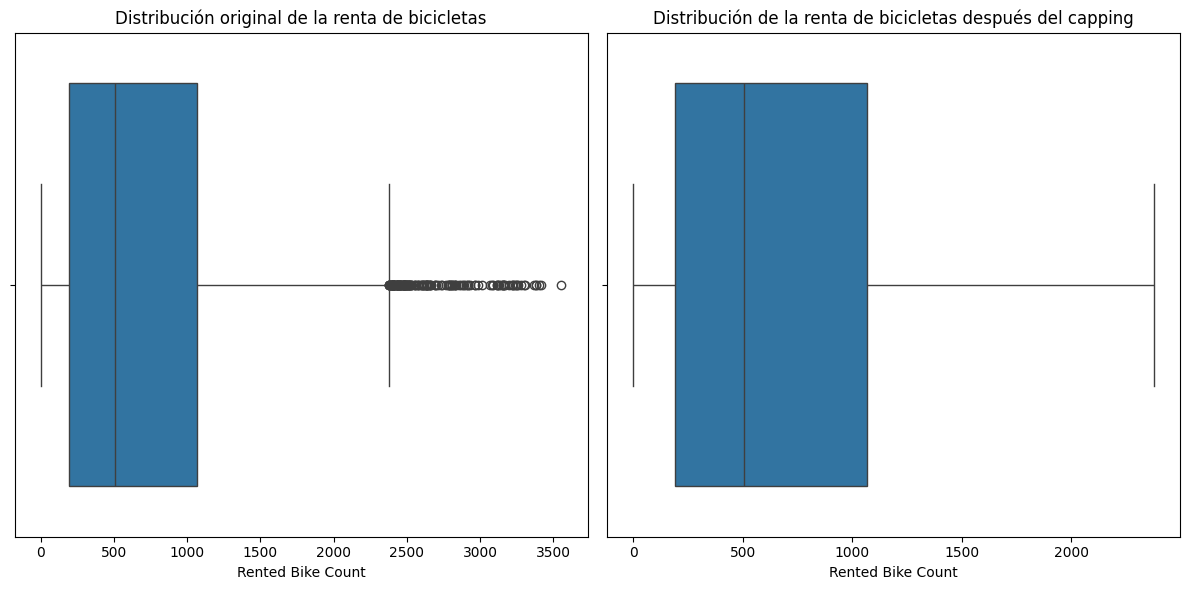

In [15]:


# Detección usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detectamos outliers en la columna 'Rented Bike Count'
outliers_rbc, lower_bound, upper_bound = detect_outliers_iqr(df_bikes, 'Rented Bike Count')

print(f"Número de outliers en 'Rented Bike Count': {len(outliers_rbc)}")
print(f"Límite inferior: {lower_bound:.2f}")
print(f"Límite superior: {upper_bound:.2f}")

df_capped = df_bikes.copy()
df_capped['Rented Bike Count'] = df_capped['Rented Bike Count'].clip(lower=lower_bound, upper=upper_bound)


# Visualizamos la distribución después del capping
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_bikes['Rented Bike Count'])
plt.title("Distribución original de la renta de bicicletas")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_capped['Rented Bike Count'])
plt.title("Distribución de la renta de bicicletas después del capping")

plt.tight_layout()
plt.show()

#Features descartadas
🔴Hour: esta feature  fue considerada como opcional porque puede ser útil y tiene cierta relación con lo que sucede en la realidad, pero no es esencialmente lineal, sino que la linealidad puede extraerse segmentando del dominio, complejizando el caso de estudio

🔴Humidity: no es lineal, tiene mucha dispersión y forma de campana.

🔴Wind speed:  a pesar de que tiene cierta tendencia negativa, posee mucha dipsersión.

🔴Solar Radiation: tiene una tendencia negativa, pero a partir de 1.5 se "estabiliza" lo cual podría afectar al modelo o agregar datos poco correlacionados.

🔴Seasons: este feature puede ser útil para analizar contextos, pero como ya existen muchos otros features mas específicos, usar seasons no solo sería en cierto punto, redundante, sino que podría aportar ruido.

🔴Functioning Day: No es muy útil, ya que esta variable refiere a si están disponibles o no las bicicletas.

In [16]:
df_bikes_dropped = df_bikes.drop(columns=["Hour", "Humidity(%)", "Wind speed (m/s)","Solar Radiation (MJ/m2)","Seasons", "Functioning Day","Date"])
df_bikes_dropped.head()

,Rented Bike Count,Temperature(°C),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Snowfall (cm),Holiday
0,254,-5.2,2000,-17.6,0.0,0.0,No Holiday
1,204,-5.5,2000,-17.6,0.0,0.0,No Holiday
2,173,-6.0,2000,-17.7,0.0,0.0,No Holiday
3,107,-6.2,2000,-17.6,0.0,0.0,No Holiday
4,78,-6.0,2000,-18.6,0.0,0.0,No Holiday


#Variables categóricas
La variable categórica que se van a utilizar es:

🟢 Holiday (categórica binaria)


#Importante:

🟢 Rainfall y snowfall aportan información tan relevante que para compensar la no linealidad, se van a reestructurar para 2 categorías cada una: Llueve(1)/No Llueve(0) y Nieva(1)/No Nieva(0)


In [17]:
#Se utiliza umbrales para crear columnas binarias para Snowfall y Rainfall
df_bikes_binary = df_bikes_dropped.copy()
df_bikes_binary["Snowfall_binary"] = (df_bikes_binary["Rainfall(mm)"] > 1).astype(int)
df_bikes_binary["Rainfall_binary"] = (df_bikes_binary["Snowfall (cm)"] >= 0.1).astype(int)


In [18]:

#Como no existe un orden inherente entre Holiday y No Holiday, se decide usar one-hot Encoding
df_bikes_onehot = df_bikes_binary.copy()

# One-Hot Encoding para 'Holiday'
df_bikes_onehot = pd.get_dummies(df_bikes_onehot, columns=['Holiday'], drop_first=True)
df_bikes_onehot.head()

,Rented Bike Count,Temperature(°C),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Snowfall (cm),Snowfall_binary,Rainfall_binary,Holiday_No Holiday
0,254,-5.2,2000,-17.6,0.0,0.0,0,0,True
1,204,-5.5,2000,-17.6,0.0,0.0,0,0,True
2,173,-6.0,2000,-17.7,0.0,0.0,0,0,True
3,107,-6.2,2000,-17.6,0.0,0.0,0,0,True
4,78,-6.0,2000,-18.6,0.0,0.0,0,0,True


In [19]:
df_bikes_clean = df_bikes_onehot.drop(columns=["Rainfall(mm)","Snowfall (cm)"])
df_bikes_clean.head()

,Rented Bike Count,Temperature(°C),Visibility (10m),Dew point temperature(°C),Snowfall_binary,Rainfall_binary,Holiday_No Holiday
0,254,-5.2,2000,-17.6,0,0,True
1,204,-5.5,2000,-17.6,0,0,True
2,173,-6.0,2000,-17.7,0,0,True
3,107,-6.2,2000,-17.6,0,0,True
4,78,-6.0,2000,-18.6,0,0,True


#Escalado
Centra los datos en una media de 0 y una desviación estándar de 1.

In [20]:
#Aplicamos StandardScaler
df_standard = df_bikes_clean.copy()
scaler = StandardScaler()

#Separamos objetivo y predictores
X = df_standard.drop('Rented Bike Count', axis=1)
y = df_standard['Rented Bike Count']

#Escalado
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Estadísticas descriptivas después de la estandarización:")
print(X_scaled_df.describe().round(2))

Estadísticas descriptivas después de la estandarización:
       Temperature(°C)  Visibility (10m)  Dew point temperature(°C)  \
count          8760.00           8760.00                    8760.00   
mean              0.00             -0.00                      -0.00   
std               1.00              1.00                       1.00   
min              -2.57             -2.32                      -2.66   
25%              -0.79             -0.82                      -0.67   
50%               0.07              0.43                       0.08   
75%               0.81              0.93                       0.82   
max               2.22              0.93                       1.77   

       Snowfall_binary  Rainfall_binary  Holiday_No Holiday  
count          8760.00          8760.00             8760.00  
mean              0.00            -0.00                0.00  
std               1.00             1.00                1.00  
min              -0.17            -0.23               -

#División Train/Test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)   #20% para test y 80% para entrenamiento





## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


#Modelo de regresión lineal

In [22]:

#Creación del modelo de regresión lineal
reg_model = linear_model.LinearRegression()

#Entrenamiento del modelo
reg_model.fit(X_train, y_train)

#Predicciones a partir del conjunto de testeo y entrenamiento
y_test_pred = reg_model.predict(X_test)
y_train_pred = reg_model.predict(X_train)

In [23]:
#Coeficientes
print("Coefficients: \n", reg_model.coef_)


#Métricas en el entrenamiento
train_mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
train_mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
print("==========CONJUNTO DE ENTRENAMIENTO============")
print("Coeficiente de determinación: %.2f" % train_r2 )
print("Coeficiente MSE: %.2f" % train_mse )
print("Coeficiente MAE: %.2f" % train_mae )
print("Coeficiente RMSE: %.2f" % train_rmse )


test_mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
test_mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("==========CONJUNTO DE TEST============")
print("Coeficiente de determinación: %.2f" % test_r2 )
print("Coeficiente MSE: %.2f" % test_mse )
print("Coeficiente MAE: %.2f" % test_mae )
print("Coeficiente RMSE: %.2f" % test_rmse )


Coefficients: 
 [ 669.49088779   28.95447523 -348.7826254   -75.4188167    13.17052979
   35.8995521 ]
==========CONJUNTO DE ENTRENAMIENTO============
Coeficiente de determinación: 0.38
Coeficiente MSE: 257707.71
Coeficiente MAE: 367.98
Coeficiente RMSE: 507.65
==========CONJUNTO DE TEST============
Coeficiente de determinación: 0.40
Coeficiente MSE: 250173.00
Coeficiente MAE: 362.85
Coeficiente RMSE: 500.17



## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



#Análisis coeficientes (escalados):


*   Temperature(°C): 669.49088779 y signo positivo(Relación positiva). Tiene un impacto relevante.
*   Visibility (10m): 28.95447523 y signo positivo (Relación positiva). Su impacto no es tan relevante.
*   Dew point temperature(°C):-348.7826254 y signo negativo(Relación negativa). Tiene un gran impacto.
*   Snowfall_binary: -75.4188167  y signo negativo(relación negativa). Tiene un impacto moderado
*   Rainfall_binary:  13.17052979 y signo positivo (relación positiva). Su impacto no es tan relevante.
*   Holiday_No Holiday: 35.8995521 y signo positivo (Relación positiva). Su impacto no es tan relevante.





## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



Dentro de las variables elegidas inicialmente, las mas importantes según el modelo son la Temperature(°C), Dew point temperature(°C) y Snowfall. Sin embargo, hay algunos aspectos en los que no coincide del todo con el análisis exploratorio:



* Dew point temperature(°C) según la gráfica de correlación, la tendencia es positiva (crecimiento). Sin embargo, dado que las variables trabajan complementándose, esperar resultados en un contexto local, puede ser poco relevante.

* Visibility (10m), según el EDA tiene una fuerte correlación, cosa que no se ve reflejada en el coeficiente del modelo.

* Rainfall tiene una gráfica "similar" a la de snowfall, pero el coeficiente no refleja el mismo impacto (o similar)

* Aquellas variables que fueron convertidas a binario  tienen coeficientes más bajos de lo que se podría esperar viendo el EDA. Pero esto puede verse afectado por posibles limitaciones del modelo de regresión lineal o la correlación de otras variables, en el funcionamiento complementario de todas ellas.


Por otro lado R² tiene un valor bajo (0.40) y un MSE alto(Mal rendimiento). Esto puede deberse a distintos factores:


*   Hay relaciones no lineales. Si bien fueron elegidas las relaciones que más se acercaban a la linealidad, no eran completamente lineales o existía mucha dispersion
*  Multicolinealidad: algunas variables tienen alguna correlación entre si, debilitando el efecto aparente de cada una.
*  Variables predictoras insuficientes o irrelevantes


A pesar de todo eso, el hecho de que existan coeficientes similares entre el conjunto de testeo y de entrenamiento, implica que el modelo generaliza bastante bien.







## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [24]:

feature_names = ["Temperature(°C)","Visibility (10m)","Dew point temperature(°C)","Snowfall_binary","Rainfall_binary","Holiday_No Holiday"]

#Entrenamiento modelo original
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

#Importancia por permutación
r = permutation_importance(reg_model, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

#Importancias
for i in r.importances_mean.argsort()[::-1]:
      print(f"{feature_names[i]:<8} "
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")




Temperature(°C) 2.250 +/- 0.073
Dew point temperature(°C) 0.614 +/- 0.021
Snowfall_binary 0.034 +/- 0.005
Holiday_No Holiday 0.005 +/- 0.002
Visibility (10m) 0.004 +/- 0.001
Rainfall_binary 0.000 +/- 0.001


In [25]:
selected_features = ["Temperature(°C)","Dew point temperature(°C)"]

#Convertir en dataframes
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test  = pd.DataFrame(X_test,  columns=feature_names)

X_train_selected = X_train[selected_features]
X_test_selected  = X_test[selected_features]


#Nuevo modelo
reg_model_new = LinearRegression()

# Entrenamos con las variables seleccionadas
reg_model_new.fit(X_train_selected, y_train)
r2_train = reg_model_new.score(X_train_selected, y_train)
r2_test  = reg_model_new.score(X_test_selected, y_test)

print(f"R² Train: {r2_train:.3f}")
print(f"R² Test : {r2_test:.3f}")

R² Train: 0.361
R² Test : 0.379



---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  


#TP2: REGRESIÓN

#Introducción:

La consigna pide hacer implementaciones con la librería MLP. Se asume inicialmente que se refiere a la librería de sklearn, específicamente a MLPRegressor dada la naturaleza del problema.
A pesar de que en el tp no se muestran las implementaciones, se hizo algunos entrenamientos en sklearn. Sin embargo esta librería cuenta con un problema, y es que no es tan amigable con el uso de la GPU (necesaria para hacer pruebas más ráidas).
Es por eso que se decidió utilizar tensorflow con un entorno de ejecución de GPU. Se barajó utilizar un entorno de ejecución de tipo TPU, sin embargo, para modelos con pocas capas esto puede ser contraproducente ya que la TPU requiere un costo de tiempo inicial que no vale la pena.

In [35]:
#Librerías
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,mean_absolute_percentage_error


#Escalado

In [36]:
#Aplicamos StandardScaler
df_mlp = df_standard.copy()
scaler = StandardScaler()

#Separamos objetivo y predictores
X_mlp = df_mlp.drop('Rented Bike Count', axis=1)
y_mlp = df_mlp['Rented Bike Count']

#Escalado
X_mlp_scaled = scaler.fit_transform(X_mlp )
X__mlp_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Estadísticas descriptivas después de la estandarización:")
print(X__mlp_scaled_df.describe().round(2))



Estadísticas descriptivas después de la estandarización:
       Temperature(°C)  Visibility (10m)  Dew point temperature(°C)  \
count          8760.00           8760.00                    8760.00   
mean              0.00             -0.00                      -0.00   
std               1.00              1.00                       1.00   
min              -2.57             -2.32                      -2.66   
25%              -0.79             -0.82                      -0.67   
50%               0.07              0.43                       0.08   
75%               0.81              0.93                       0.82   
max               2.22              0.93                       1.77   

       Snowfall_binary  Rainfall_binary  Holiday_No Holiday  
count          8760.00          8760.00             8760.00  
mean              0.00            -0.00                0.00  
std               1.00             1.00                1.00  
min              -0.17            -0.23               -

In [37]:
#División del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

Para poder construir y analizar el modelo se pueden hacer algunas pruebas. El caso más simple es utilizar una sola capa oculta con un número fijo de neuronas. Sin embargo, podría ser demasiado simple por lo que se opta por usar 3 capas ocultas con la misma cantidad de neuronas cada una. El modelo sigue siendo simple, pero puede representar un mejor aprendizaje.


In [38]:
#La función permite pasar la cantidad de capas y de neuronas (fijas)
def build_and_evaluate_mlp(X_train, X_test, y_train, y_test,
                           n_layers=3, n_neurons=64,
                           learning_rate=0.001, epochs=100, batch_size=32, verbose=True):

    # Crear tupla con cantidad de neuronas por capa
    hidden_layers = tuple([n_neurons] * n_layers)

    # Definir el modelo
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layers,
        activation='relu',
        solver='adam',
        learning_rate_init=learning_rate,
        max_iter=epochs,
        batch_size=batch_size,
        random_state=42,
        verbose=verbose
    )

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas
    def evaluar(y_true, y_pred, nombre):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        print(f"\n📊 Resultados para {nombre}:")
        print(f"   MSE  = {mse:.4f}")
        print(f"   RMSE = {rmse:.4f}")
        print(f"   MAE  = {mae:.4f}")
        print(f"   MAPE = {mape*100:.2f}%")
        print(f"   R²   = {r2:.4f}")
        return {"MSE": mse, "RMSE": rmse, "MAE": mae, "MAPE": mape, "R2": r2}

    # Evaluaciones
    resultados_train = evaluar(y_train, y_train_pred, "Entrenamiento")
    resultados_test = evaluar(y_test, y_test_pred, "Test")
    return model, resultados_train, resultados_test

# Modelo 1 capa - 64 neuronas
model_1n, train_metrics, test_metrics = build_and_evaluate_mlp(
    X_train, X_test, y_train, y_test,
    n_layers=1,
    n_neurons=64,
    learning_rate=0.001,
    epochs=100,
    batch_size=32
)


Iteration 1, loss = 453164.08073808
Iteration 2, loss = 437703.16404019
Iteration 3, loss = 405294.53613795
Iteration 4, loss = 359971.03674097
Iteration 5, loss = 310431.56134736
Iteration 6, loss = 264251.17816821
Iteration 7, loss = 226504.39438136
Iteration 8, loss = 199271.17111769
Iteration 9, loss = 180852.50380321
Iteration 10, loss = 168674.96487821
Iteration 11, loss = 159976.90798318
Iteration 12, loss = 153605.23004520
Iteration 13, loss = 148975.96539488
Iteration 14, loss = 145651.87331816
Iteration 15, loss = 143355.11277384
Iteration 16, loss = 141807.10592637
Iteration 17, loss = 140662.78698054
Iteration 18, loss = 139770.78674904
Iteration 19, loss = 139034.02634600
Iteration 20, loss = 138330.69125756
Iteration 21, loss = 137675.33619317
Iteration 22, loss = 137040.71399751
Iteration 23, loss = 136447.22050039
Iteration 24, loss = 135899.28652244
Iteration 25, loss = 135351.40512128
Iteration 26, loss = 134838.59563165
Iteration 27, loss = 134342.39908712
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


El modelo con 1 sola neurona tiene un coeficiente de determinación ligeramente superior:

*   Regresión lineal: Entrenamiento(0.38) --- test (0.4)
*   MLP 1 capa - 64 neuronas: entrenamiento(0.4) --- test(0.4218)

En principio ambos modelos generalizan de manera similar, pero el segundo explica mejor la variabilidad.

Lo siguiente que se puede analizar es que sucede si fijamos la cantidad de neuronas pero a lo largo de 3 capas.


In [34]:
#Modelo 3 capas - 64 neuronas
model_3n, train_metrics, test_metrics = build_and_evaluate_mlp(
    X_train, X_test, y_train, y_test,
    n_layers=3,
    n_neurons=64,
    learning_rate=0.001,
    epochs=100,
    batch_size=32
)

Iteration 1, loss = 305608.88016779
Iteration 2, loss = 144162.94831331
Iteration 3, loss = 135536.83633735
Iteration 4, loss = 130383.32909647
Iteration 5, loss = 127166.55801713
Iteration 6, loss = 125759.78381357
Iteration 7, loss = 124838.37839089
Iteration 8, loss = 124269.51061917
Iteration 9, loss = 123816.94774733
Iteration 10, loss = 123569.61824859
Iteration 11, loss = 123275.13633681
Iteration 12, loss = 123267.72388100
Iteration 13, loss = 122816.36470286
Iteration 14, loss = 122871.47277489
Iteration 15, loss = 122674.11278471
Iteration 16, loss = 122695.75441044
Iteration 17, loss = 122785.83533074
Iteration 18, loss = 122234.07551741
Iteration 19, loss = 121949.95271082
Iteration 20, loss = 121898.34747411
Iteration 21, loss = 121670.14562021
Iteration 22, loss = 121747.98771658
Iteration 23, loss = 121653.41883036
Iteration 24, loss = 121490.10364134
Iteration 25, loss = 121537.53805650
Iteration 26, loss = 121087.06462081
Iteration 27, loss = 121155.44236940
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


El modelo con 3 capas con 64 neuronas tiene un mejor desempeño:

*   MLP 2: Entrenamiento(0.4697) --- test (0.4691)

No solo el coeficiente de determinación es major, lo cual explica en mayor porcentaje la variabilidad. Sino que la diferencia entreel entrenamiento y el testeo es menor, lo cual significa que generaliza mejor.


#Underfitting y Overfitting
Para analizar el underfitting y el overfitting puede ser necesario comparar las métricas del modelo a lo largo de distintos entrenamientos con diferentes hiperparámetros.
La cantidad de neuronas y la cantidad de capas son dos de los hiperparámetros más directos a la hora de modificar el rendimiento del modelo.

Si bien podría probarse cambiando los valores de forma arbitraria, puede resultar difícil identificar estos fenómenos con precisión.
Para solucionar esto, se decidió variar los hiperparámetros mencionados y graficar el MSE correspondiente al conjunto de entrenamiento y al de testeo en cada caso.

Sin embargo, la librería scikit-learn no está optimizada para el uso de GPU, lo cual resulta necesario al realizar una gran cantidad de cálculos durante múltiples entrenamientos. Además, mi intención es variar tanto la cantidad de capas como la de neuronas, lo que incrementa aún más la carga computacional.De hecho, se intentó realizar esto con la librería de sklearn y el tiempo de ejecución superaba las 9 horas.

Por este motivo, se decidió utilizar TensorFlow, que permite aprovechar la aceleración por GPU y facilita la experimentación con redes neuronales más complejas. Cabe aclarar que se pensó en utilizar TPU, pero para modelos de este tipo, no se compensa el coste de tiempo inicial respecto a las posibilidades de la GPU.

#Instalación de tensorflow

In [35]:
pip install tensorflow

#Librerías necesarias

In [3]:
#Librerías
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



#Entrenamiento inicial

Primero, repetimos el entrenamientod el modelo de 3 capas con 64 neuronas cada una.

In [37]:

X_train, X_test, y_train, y_test = train_test_split(
    X_mlp_scaled, y_mlp, test_size=0.2, random_state=42
)

# Definir el modelo secuencial
model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),

  layers.Dense(1)  # salida (última capa)
])
adam_optimizer = optimizers.Adam(learning_rate=0.001)

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='mse',        # error cuadrático medio
    metrics=['mae']    # error absoluto medio
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # parte del train para validación
    epochs=100,
    batch_size=32,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 812161.5625 - mae: 651.8846 - val_loss: 312615.9062 - val_mae: 425.6443
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 310743.0938 - mae: 418.7401 - val_loss: 285678.1562 - val_mae: 398.6428
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 283882.3438 - mae: 391.7988 - val_loss: 269447.0312 - val_mae: 380.5976
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 268125.7188 - mae: 374.6945 - val_loss: 257724.1719 - val_mae: 368.1707
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 256149.9844 - mae: 363.8416 - val_loss: 254356.4688 - val_mae: 370.2793
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 256234.0156 - mae: 360.9220 - val_loss: 247637.9531 - val_mae: 360.2146
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 244586.4531 - mae: 350.4463 - val_loss: 246552.6719 - val_mae: 359.4613
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 255245.

#Evaluación

In [38]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"📈 Pérdida (MSE) en test: {test_loss:.2f}")
print(f"📏 Error absoluto medio (MAE) en test: {test_mae:.2f}")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 231657.9062 - mae: 335.9679
📈 Pérdida (MSE) en test: 220260.45
📏 Error absoluto medio (MAE) en test: 330.73


#Predicciones

In [39]:
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


#Métricas

In [40]:
# Métricas sobre entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train  = r2_score(y_train, y_train_pred)

# Métricas sobre test
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test  = r2_score(y_test, y_test_pred)

# Mostrar resultados
print("📊 MÉTRICAS DE ENTRENAMIENTO:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"R² : {r2_train:.3f}")

print("\n📊 MÉTRICAS DE TEST:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"R² : {r2_test:.3f}")

📊 MÉTRICAS DE ENTRENAMIENTO:
MAE: 334.16
MSE: 221161.27
R² : 0.468

📊 MÉTRICAS DE TEST:
MAE: 330.73
MSE: 220260.44
R² : 0.471


#Gráfico a lo largo de cada epoch

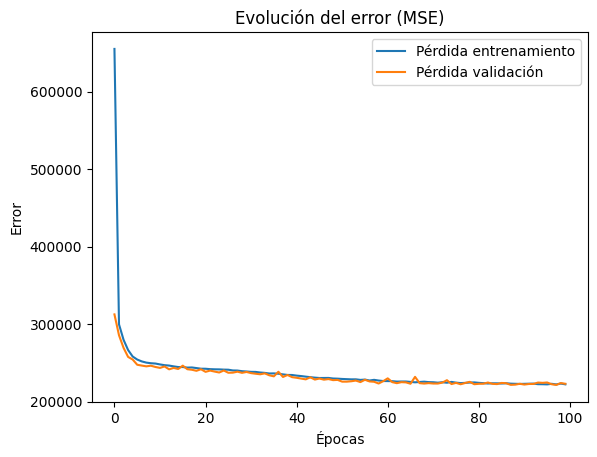

In [41]:
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Evolución del error (MSE)')
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.legend()
plt.show()

Podemos observar que hay leves diferencias en las métricas, pero irrelevantes ya que la intención ahora es analizar los fenómenos de overfitting y underfitting. El gráfico nos dice:


*   Aprende correctamente (el error disminuye de manera sostenida)
*   Los valores altos al inicio son esperables dada la aleatoriedad
*   No hay un sobreajuste marcado ya que el error de testo se mantiene cerca del de entrenamiento
*   Generaliza bien, ya que la diferencia entre los errores es muy baja.








#Reducción del Dataset.
A pesar de que la GPU acelerará el tiempo de procesamiento, puede ser interesante ver que sucede al reducir el dataset un 80%. Esto hará el entrenamiento aún más rápido y puede revelarnos alguna información sobre la importancia de tener un dataset sólido y completo.

In [42]:
X_reduced, _, y_reduced, _ = train_test_split(
    X_mlp_scaled, y_mlp,
    train_size=0.2,     # usamos solo el 20% del total
    random_state=42,
    shuffle=True
)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_reduced, y_reduced,
    test_size=0.2,      # 20% de ese 20% → 4% del total original
    random_state=42,
    shuffle=True
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


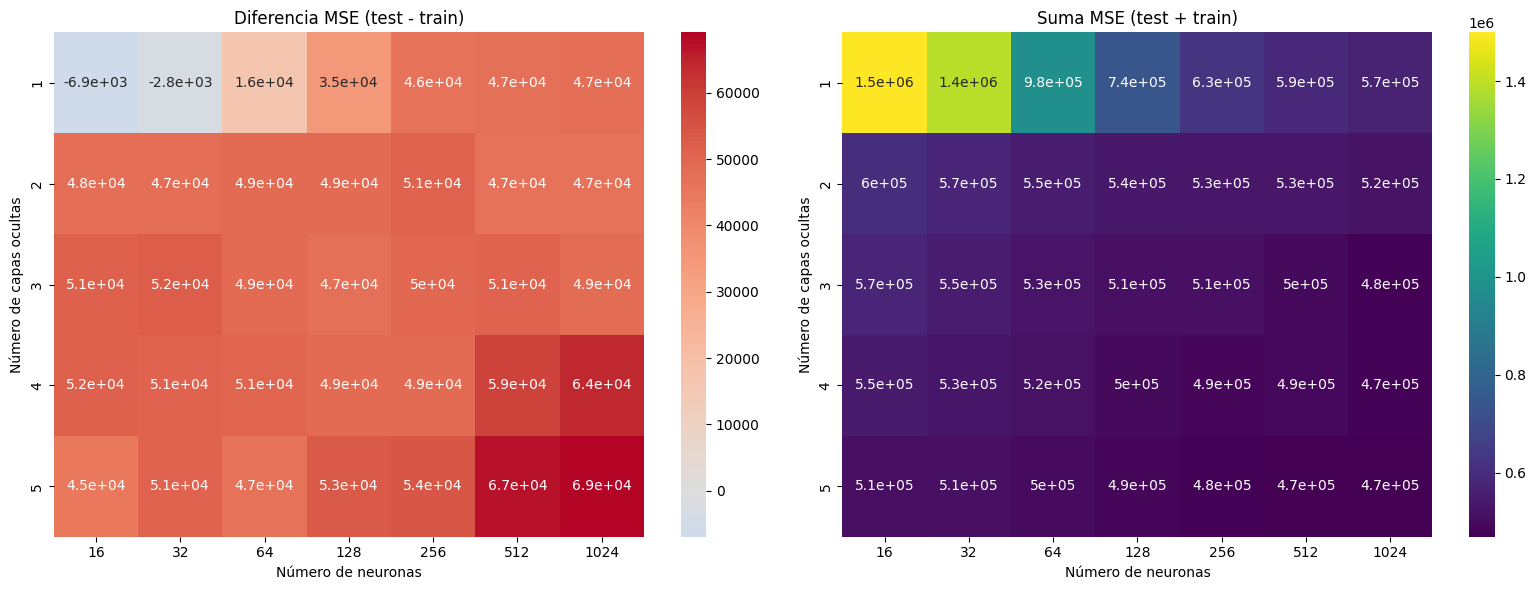

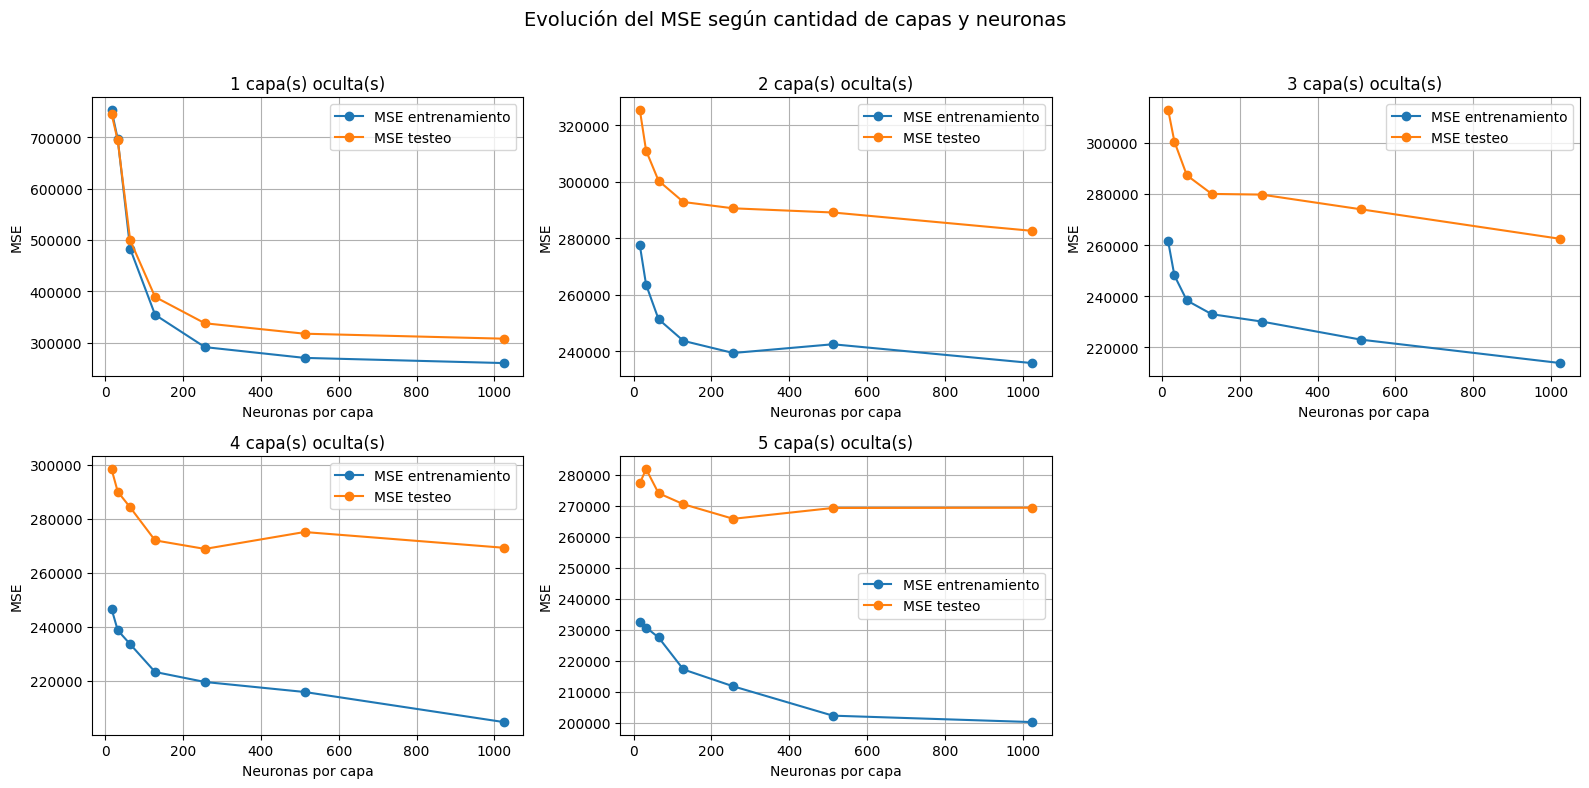

In [43]:

# Función para construir y entrenar el modelo
def build_and_train_model(n_layers, n_neurons, X_train, y_train, X_test, y_test, epochs=30, verbose=0):
    model = models.Sequential()
    # Capa de entrada
    model.add(layers.Dense(n_neurons, activation='relu', input_shape=(X_train.shape[1],)))

    # Capas ocultas adicionales
    for _ in range(n_layers - 1):
        model.add(layers.Dense(n_neurons, activation='relu'))

    # Capa de salida
    model.add(layers.Dense(1, activation='linear'))

    #Compilación
    model.compile(optimizer=optimizers.Adam(0.001), loss='mse')

    #Entrenamiento
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=verbose)

    #Evaluaciones
    train_mse = model.evaluate(X_train, y_train, verbose=0)
    test_mse = model.evaluate(X_test, y_test, verbose=0)

    return train_mse, test_mse


# Parámetros de búsqueda
layers_list = [1, 2, 3, 4, 5]   # 1, 2, 3, 4, 5 capas
neurons_list = [16, 32, 64, 128, 256, 512, 1024]  #16, 32, 64, 128, 256, 512, 1024 neuronas


#Arreglos "vacíos" para graficar más adelante
results_diff = np.zeros((len(layers_list), len(neurons_list)))
results_sum = np.zeros_like(results_diff)
results_train = np.zeros_like(results_diff)
results_test = np.zeros_like(results_diff)


# Entrenamiento de modelos
for i, n_layers in enumerate(layers_list):
    for j, n_neurons in enumerate(neurons_list):
      #Se pasan los conjuntos reducidos
        train_mse, test_mse = build_and_train_model(
            n_layers, n_neurons, X_train_small, y_train_small, X_test_small, y_test_small, epochs=30
        )
        #Completado de los arreglos
        results_train[i, j] = train_mse
        results_test[i, j] = test_mse
        results_diff[i, j] = test_mse - train_mse
        results_sum[i, j] = test_mse + train_mse


# Figura 1: Heatmaps lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap diferencia
df_diff = pd.DataFrame(results_diff, index=layers_list, columns=neurons_list)
sns.heatmap(df_diff, annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Diferencia MSE (test - train)')
axes[0].set_xlabel('Número de neuronas')
axes[0].set_ylabel('Número de capas ocultas')

# Heatmap suma
df_sum = pd.DataFrame(results_sum, index=layers_list, columns=neurons_list)
sns.heatmap(df_sum, annot=True, cmap='viridis', ax=axes[1])
axes[1].set_title('Suma MSE (test + train)')
axes[1].set_xlabel('Número de neuronas')
axes[1].set_ylabel('Número de capas ocultas')

plt.tight_layout()
plt.show()


# Figura 2: Evolución del MSE por capas y neuronas
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, n_layers in enumerate(layers_list):
    ax = axes[i]
    ax.plot(neurons_list, results_train[i, :], marker='o', label='MSE entrenamiento')
    ax.plot(neurons_list, results_test[i, :], marker='o', label='MSE testeo')
    ax.set_title(f'{n_layers} capa(s) oculta(s)')
    ax.set_xlabel('Neuronas por capa')
    ax.set_ylabel('MSE')
    ax.grid(True)
    ax.legend()

# Eliminar subplot vacío si sobran
for j in range(len(layers_list), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Evolución del MSE según cantidad de capas y neuronas', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Se utiliza el MSE porque mide la distancia de las predicciones respecto a los valores reales.

Para hacer el análisis, se terminó eligiendo 2 heatmaps:


*   El primer heatmap muestra la diferencia del MSE del testeo respecto al de entrenamiento. Si la diferencia es cercana a 0, implica que el modelo generaliza bien y que tiene un buen desempeño. Pero puede suceder que ambos MSE sean parecidos, pero altos al mismo tiempo, por lo cual, el segundo heatmap nos aporta más información. Si la suma de ambos MSE es un valor alto, significa que existe un posible Underfitting. Si el valor también fuese cercano a 0, entonces si estaríamos en condiciones de hablar de un buen funcionamiento.
*  Si en el primer heatmap, la diferencia es negativa, implica que el MSE de entrenamiento es mayor que el de testeo. Esto no necesariamente es malo, sino predecible, especialmente en modelos que subajustan. Esto se puede verificar en la suma, ya que también debería determinar un valor elevado

*   Si en el primer heatmap, la diferencia es positiva y elevada, significa que el MSE de entrenamiento es menor que el de testeo, lo cual puede significar Overfitting

En el primer análisis (20% del dataset original con un tiempo de ejecución de 5 mins aprox.) podemos notar algunas cosas:


*   Las primeras celdas (pocas neuronas y pocas capas) vemos una diferencia cercana a 0, pero cuando vemos el segundo heatmap, vemos un valor elevado. Esto es signo de underfitting a pesar de la buena generalización. Esto puede ser resapaldado en el gráfico para 1 capa y pocas neuronas, en donde podemos ver los MSE más grandes. Claramente hay subajuste
*   En las celdas correspondientes para modelos con muchas neuronas y capas, hay riesgo de overfitting. De hecho, segun el heatmap, la celda correspondiente a 5 capas y 1024 neuronas tiene una de las diferencias más alta (positiva). Si analizamos el gráfico inferior correspondiente podemos ver que el MSE del entrenamiento tiene a bajar pero el de testeo, subir o mantenerse. Esto no solo es señal de overfitting sino que aumentar las capas y neuronas podría ser contraproducente por el costo computacional frente al desempeño.


De todas formas no hay que olvidar de que el dataset esta reducido un 80%, por lo tanto, es normal no encontrar casos donde el funcionamiento sea relativamente bueno. De hecho, como la mayoria de los valores son positivos y relativamente grandes, es una señal de que el modelo solo puede memorizar los poco datos disponibles e insuficientes.







#Conjuntos originales
Ahora podemos aplicar la función desarrollada pero con los conjuntos sin reducir

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


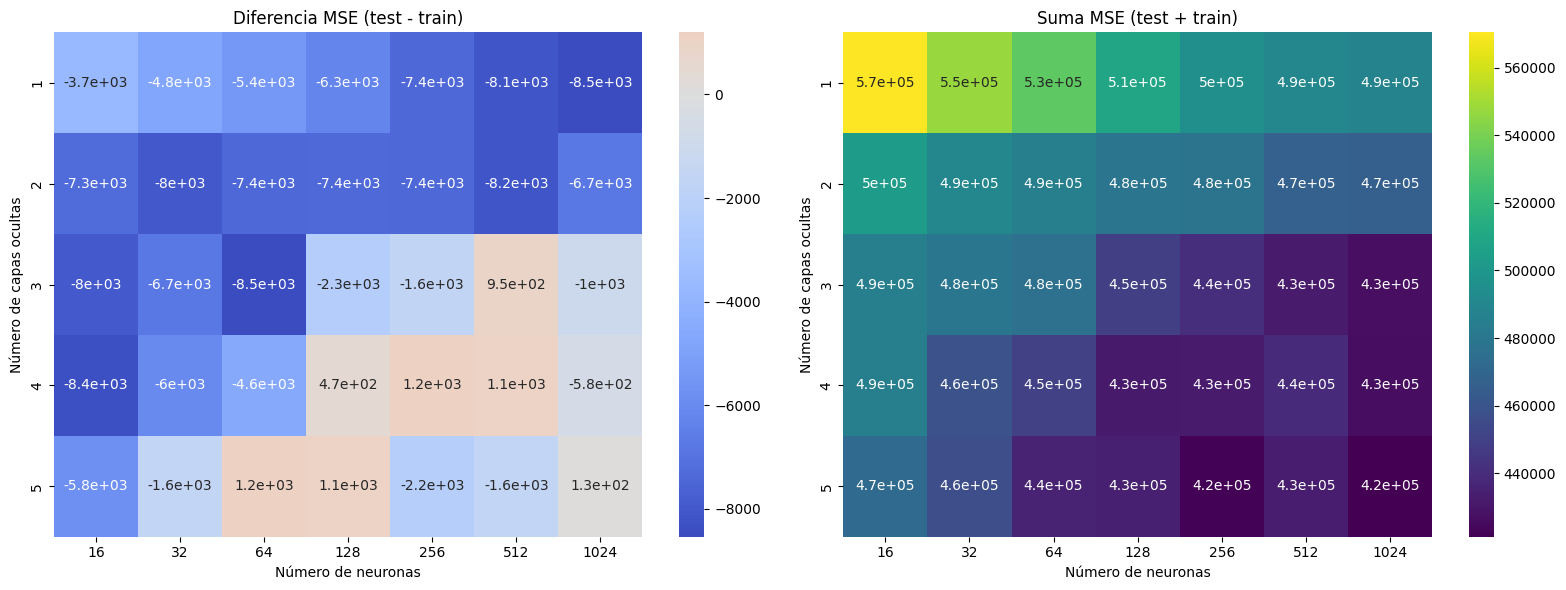

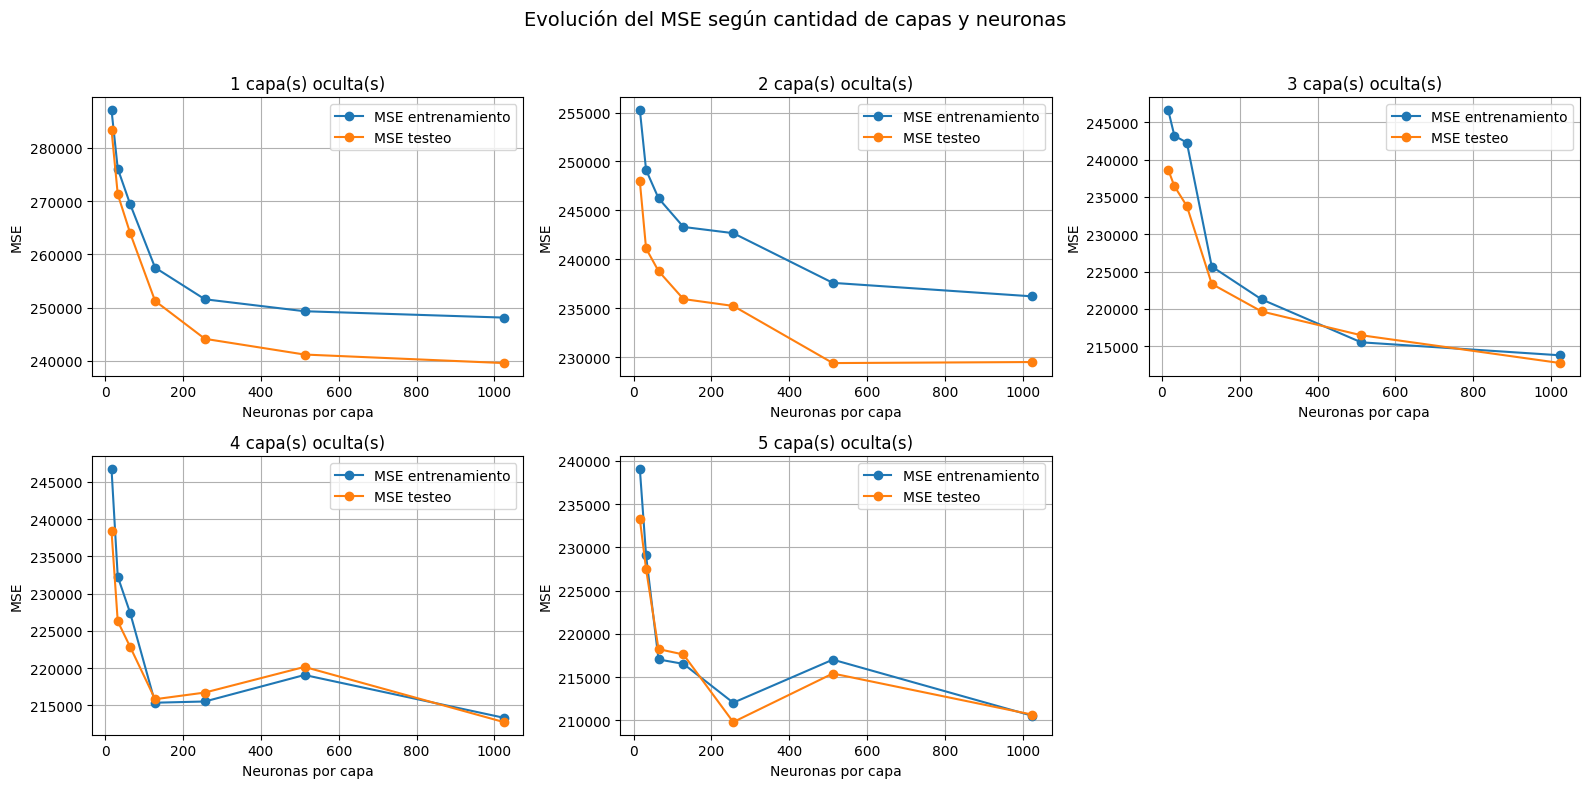

In [44]:

results_diff = np.zeros((len(layers_list), len(neurons_list)))
results_sum = np.zeros_like(results_diff)
results_train = np.zeros_like(results_diff)
results_test = np.zeros_like(results_diff)


for i, n_layers in enumerate(layers_list):
    for j, n_neurons in enumerate(neurons_list):
      #Se pasan los conjuntos sin reducción
        train_mse, test_mse = build_and_train_model(
            n_layers, n_neurons, X_train, y_train, X_test, y_test, epochs=30
        )
        results_train[i, j] = train_mse
        results_test[i, j] = test_mse
        results_diff[i, j] = test_mse - train_mse
        results_sum[i, j] = test_mse + train_mse


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


df_diff = pd.DataFrame(results_diff, index=layers_list, columns=neurons_list)
sns.heatmap(df_diff, annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Diferencia MSE (test - train)')
axes[0].set_xlabel('Número de neuronas')
axes[0].set_ylabel('Número de capas ocultas')


df_sum = pd.DataFrame(results_sum, index=layers_list, columns=neurons_list)
sns.heatmap(df_sum, annot=True, cmap='viridis', ax=axes[1])
axes[1].set_title('Suma MSE (test + train)')
axes[1].set_xlabel('Número de neuronas')
axes[1].set_ylabel('Número de capas ocultas')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, n_layers in enumerate(layers_list):
    ax = axes[i]
    ax.plot(neurons_list, results_train[i, :], marker='o', label='MSE entrenamiento')
    ax.plot(neurons_list, results_test[i, :], marker='o', label='MSE testeo')
    ax.set_title(f'{n_layers} capa(s) oculta(s)')
    ax.set_xlabel('Neuronas por capa')
    ax.set_ylabel('MSE')
    ax.grid(True)
    ax.legend()


for j in range(len(layers_list), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Evolución del MSE según cantidad de capas y neuronas', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



Con el dataset completo(15 mins de ejecución aprox.), podemos ver otro panorama:


*   Para el modelo con 5 capas y 1024 neuronas, vemos una diferencia cercana a 0 (de hecho la más baja) y que coincide con la suma más baja del segundo heatmap. Los valores siguen siendo altos, pero se podría decir de que de todos los casos, es el que mejor funciona
*   Para el modelo  de 4 capas y 512 neuronas, vemos una diferencia positiva relativamente pequeña. El overfitting suele requerir diferencias relativamente elevadas, pero es una señal de posible overfitting. Es importante aclarar que la palabra "relativa" se debe a que a pesar de que en los gráficos, los puntos puedan estar cerca, los números son elevados.

*   Para el modelo de 1 capa y 16 neuronas, vemos una diferencia negativa. Y si vemos el segundo heatmap, podemos complementar con el hecho de que ambos valores son elevados. Esto es señal de underfitting

Si podemos ver que con más datos, generaliza mucho mejor, ya que vemos diferencias mas pequeñas.

De todas formas vamos a ver que sucede con estos 2 casos (overfitting y underfitting) para luego plantear que puede mejorar el funcionamiento y por que a pesar de tener resultados mejores que la regresión lineal, todavía tenemos metricas desalentadoras.





#Caso buen funcionamiento

In [40]:
#Modelo 5 capas - 1024 neuronas
model_3n, train_metrics, test_metrics = build_and_evaluate_mlp(
    X_train, X_test, y_train, y_test,
    n_layers=5,
    n_neurons=1024,
    learning_rate=0.001,
    epochs=30,
    batch_size=32
)


Iteration 1, loss = 150802.81371567
Iteration 2, loss = 131552.96336209
Iteration 3, loss = 122933.96610589
Iteration 4, loss = 119423.23098102
Iteration 5, loss = 121220.63690992
Iteration 6, loss = 118419.37960482
Iteration 7, loss = 116560.03957827
Iteration 8, loss = 114213.64454581
Iteration 9, loss = 116347.46665506
Iteration 10, loss = 115357.06186067
Iteration 11, loss = 115769.39846077
Iteration 12, loss = 114133.58869246
Iteration 13, loss = 112353.04344273
Iteration 14, loss = 113495.70723202
Iteration 15, loss = 112870.07754041
Iteration 16, loss = 112013.94165577
Iteration 17, loss = 110941.35625074
Iteration 18, loss = 114313.49992861
Iteration 19, loss = 110550.26121954
Iteration 20, loss = 111087.96747353
Iteration 21, loss = 111177.33194381
Iteration 22, loss = 110885.13008700
Iteration 23, loss = 109659.69065523
Iteration 24, loss = 111731.41421133
Iteration 25, loss = 109524.62492760
Iteration 26, loss = 109106.54622368
Iteration 27, loss = 110364.87598533
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



📊 Resultados para Entrenamiento:
   MSE  = 213411.4628
   RMSE = 461.9648
   MAE  = 329.3920
   MAPE = 12396093559588554752.00%
   R²   = 0.4868

📊 Resultados para Test:
   MSE  = 214575.5059
   RMSE = 463.2230
   MAE  = 328.8323
   MAPE = 11660602142435184640.00%
   R²   = 0.4850


La diferencia es de las más pequeñas (214575.5059 - 213411.4628 = 1164.0431 ) y a su vez como la suma es de las más bajas, implica que  sus MSE son de los más bajos. Además generaliza muy bien, y tiene un r cuadrado cercano a 5, lo cual implica una clara mejoría respecto a los otros casos (explicación del 50% aprox)

#Caso Overfitting

In [66]:
#Modelo 4 capas - 512 neuronas
model_3n, train_metrics, test_metrics = build_and_evaluate_mlp(
    X_train, X_test, y_train, y_test,
    n_layers=4,
    n_neurons=512,
    learning_rate=0.001,
    epochs=30,
    batch_size=32
)

Iteration 1, loss = 166316.52527883
Iteration 2, loss = 125394.03546742
Iteration 3, loss = 123801.57143244
Iteration 4, loss = 119652.56086380
Iteration 5, loss = 118078.37803371
Iteration 6, loss = 117925.83122061
Iteration 7, loss = 114258.50927863
Iteration 8, loss = 114366.64240940
Iteration 9, loss = 112716.05087660
Iteration 10, loss = 112904.72628511
Iteration 11, loss = 112778.28977458
Iteration 12, loss = 115086.68612250
Iteration 13, loss = 113235.02819005
Iteration 14, loss = 111094.73130922
Iteration 15, loss = 111073.95847149
Iteration 16, loss = 111421.76517692
Iteration 17, loss = 110256.34637991
Iteration 18, loss = 111071.71150311
Iteration 19, loss = 110549.03080912
Iteration 20, loss = 109967.81892033
Iteration 21, loss = 110426.33342005
Iteration 22, loss = 109035.21177083
Iteration 23, loss = 109766.63354718
Iteration 24, loss = 110026.89090327
Iteration 25, loss = 109160.16451002
Iteration 26, loss = 108444.90225058
Iteration 27, loss = 108952.93315294
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



📊 Resultados para Entrenamiento:
   MSE  = 224513.5104
   RMSE = 473.8286
   MAE  = 319.8442
   MAPE = 11186349526189156352.00%
   R²   = 0.4601

📊 Resultados para Test:
   MSE  = 230379.7542
   RMSE = 479.9789
   MAE  = 319.5240
   MAPE = 10285436265273499648.00%
   R²   = 0.4471


En este caso la diferencia es positiva (230379.7542 - 224513.5104 = 5866.2438 ) y además relativamente alta. El modelo se “memoriza” los datos de entrenamiento pero no generaliza. Cuando aplicamos el modelo a datos nuevos (test), esos errores específicos del entrenamiento ya no se repiten, y el modelo no puede predecirlos perfectamente.




#Caso Underfitting

In [39]:
#Modelo 1 capas - 16 neuronas
model_3n, train_metrics, test_metrics = build_and_evaluate_mlp(
    X_train, X_test, y_train, y_test,
    n_layers=1,
    n_neurons=16,
    learning_rate=0.001,
    epochs=30,
    batch_size=32
)

Iteration 1, loss = 455531.37854363
Iteration 2, loss = 451747.51023249
Iteration 3, loss = 444007.77778038
Iteration 4, loss = 431451.36118254
Iteration 5, loss = 414395.41439544
Iteration 6, loss = 394071.28497084
Iteration 7, loss = 371208.43081589
Iteration 8, loss = 347316.62871837
Iteration 9, loss = 323344.54513631
Iteration 10, loss = 299928.59294266
Iteration 11, loss = 277578.14998541
Iteration 12, loss = 256617.18045124
Iteration 13, loss = 237297.34694773
Iteration 14, loss = 220012.24329470
Iteration 15, loss = 205071.62450365
Iteration 16, loss = 192467.63514332
Iteration 17, loss = 182136.95292320
Iteration 18, loss = 173851.27064336
Iteration 19, loss = 167325.25922000
Iteration 20, loss = 162164.56783408
Iteration 21, loss = 158024.99082725
Iteration 22, loss = 154728.71898430
Iteration 23, loss = 152075.97671912
Iteration 24, loss = 149934.15352374
Iteration 25, loss = 148186.66510204
Iteration 26, loss = 146754.30661336
Iteration 27, loss = 145586.36011667
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Podemos ver que la diferencia es negativa (281627.3909 -  285710.2009 = -4082.81) y son valores de MSE relativamente altos. Además vemos que generaliza bastante bien dada la poca diferencia entre el r cuadrado del entrenamiento y el testeo aunque explica debilmente la variabilidad.

Si bien en el análisis con el dataset completo se plantea un caso que funciona bien. El R cuadrado es bajo. Pero queda una pregunta: que pasaría si variamos la cantidad de neuronas a lo largo de cada capa?
Resulta las primeras capas de una red neuronal necesitan una cantidad de neuronas elevadas ya que reciben toda la información (especialmente la de entrada), necesitan capturar más características. A medida que avanzamos por las capas, se van combinando las características detectadas antes y la red construye representaciones más abstractas y resumidas. Además esto ayuda a evitar el overfitting. Uno de los criterios recomendados es, por ejemplo hacer que la capa sigiente tenga la mitad de neurona. Podemos tomar el caso que funcionaba bien (5 capas con 1024 neuronas) y construir un modelo con:

1ra capa: 256,
2da capa: 128,
3ra capa: 64,
4ta capa: 32,
5ta capa: 16,


In [55]:
mlp = MLPRegressor(
    hidden_layer_sizes=(256,128, 64, 32, 16),
    activation='relu',
    solver='adam',
    max_iter=30,
    random_state=42,
    batch_size = 32,
    verbose = True
)

# Entrenar modelo
mlp.fit(X_train, y_train)

# Predecir
y_pred_train_capas = mlp.predict(X_train)
y_pred_test_capas = mlp.predict(X_test)



print_metrics(y_train, y_pred_train_capas, "Entrenamiento")
print_metrics(y_test, y_pred_test_capas, "Test")




Iteration 1, loss = 234130.90757885
Iteration 2, loss = 130068.48108468
Iteration 3, loss = 125165.45013226
Iteration 4, loss = 123771.92331037
Iteration 5, loss = 122412.60342273
Iteration 6, loss = 122035.58929376
Iteration 7, loss = 122170.03425825
Iteration 8, loss = 120713.94376190
Iteration 9, loss = 119873.38965783
Iteration 10, loss = 118715.87894656
Iteration 11, loss = 119141.52055227
Iteration 12, loss = 117098.16143795
Iteration 13, loss = 116811.90019288
Iteration 14, loss = 116569.40417205
Iteration 15, loss = 115292.55157843
Iteration 16, loss = 114920.59320616
Iteration 17, loss = 115256.46351075
Iteration 18, loss = 114342.01510148
Iteration 19, loss = 113208.65770440
Iteration 20, loss = 113377.46204677
Iteration 21, loss = 112971.84805821
Iteration 22, loss = 112195.17011451
Iteration 23, loss = 113113.90538002
Iteration 24, loss = 112300.86222832
Iteration 25, loss = 113139.84834951
Iteration 26, loss = 111559.51313977
Iteration 27, loss = 111293.06076132
Iteration 

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Podemos ver que sigue generalizando bien, pero con un coeficiente de determinación menor. La ventaja es que su ejecución tardó mucho menos que el cálculo de 5 capas con 1024 neuronas cada una. Si bien no hay overfitting, los MSE son los suficientemente grandes para hablar de underfitting. Esto dispara una nueva pregunta?
Si con redes neuronales las métricas son más alentadoras ¿por que todavía sigue teniendo un porcentaje de explicacipon de variabilidad bajo?

La respuesta esta en el dataset original y las correlaciones. Como vimos en las gráficas del tp anterior, no solo no había relaciones lineales fuertemente marcadas, sino que existe una gran dispersión de los datos. Para solucionar esto, se requiere gran cantidad de neuronas y capas, ya que un modelo simple puede no estar resolviendo correctamente la casi nula linealidad.